In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline, UnivariateSpline

In [2]:
infections = pd.read_csv("/Users/diego/git/matsim-episim-libs/output-PreLockdown/infections.txt", sep="\t")

Text(0, 0.5, 'Persone')

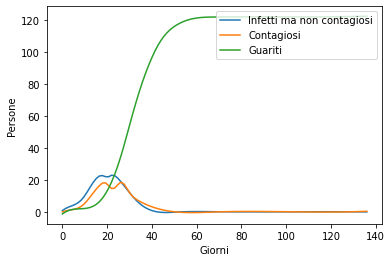

In [9]:
xs = np.linspace(0, len(infections),100) #Min, max asse x

nSusceptible = [x/10 for x in list(infections.nSusceptible)]
nInfected = [x/10 for x in list(infections.nInfectedButNotContagious)]
nContagious = [x/10 for x in list(infections.nContagious)]
nRecovered = [x/10 for x in list(infections.nRecovered)]

nSusceptible_spl = UnivariateSpline(range(0,len(nSusceptible)), nSusceptible)
nInfected_spl = UnivariateSpline(range(0,len(nInfected)), nInfected)
nContagious_spl = UnivariateSpline(range(0,len(nContagious)), nContagious)
nRecovered_spl = UnivariateSpline(range(0,len(nRecovered)), nRecovered)

#plt.plot(xs, nSusceptible_spl(xs),label='Suscettibili')
plt.plot(xs, nInfected_spl(xs),label='Infetti ma non contagiosi')
plt.plot(xs, nContagious_spl(xs),label='Contagiosi')
plt.plot(xs, nRecovered_spl(xs),label='Guariti')
plt.legend(loc='upper right')
plt.xlabel('Giorni'); plt.ylabel('Persone')

In [12]:
infections = pd.read_csv("/Users/diego/git/matsim-episim-libs/output-FirstLockdown/infections.txt", sep="\t")

Text(0, 0.5, 'Persone')

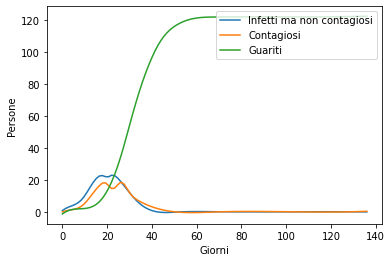

In [15]:
xs = np.linspace(0, len(infections),100) #Min, max asse x

nSusceptible = [x/10 for x in list(infections.nSusceptible)]
nInfected = [x/10 for x in list(infections.nInfectedButNotContagious)]
nContagious = [x/10 for x in list(infections.nContagious)]
nRecovered = [x/10 for x in list(infections.nRecovered)]

nSusceptible_spl = UnivariateSpline(range(0,len(nSusceptible)), nSusceptible)
nInfected_spl = UnivariateSpline(range(0,len(nInfected)), nInfected)
nContagious_spl = UnivariateSpline(range(0,len(nContagious)), nContagious)
nRecovered_spl = UnivariateSpline(range(0,len(nRecovered)), nRecovered)

#plt.plot(xs, nSusceptible_spl(xs),label='Suscettibili')
plt.plot(xs, nInfected_spl(xs),label='Infetti ma non contagiosi')
plt.plot(xs, nContagious_spl(xs),label='Contagiosi')
plt.plot(xs, nRecovered_spl(xs),label='Guariti')
plt.legend(loc='upper right')
plt.xlabel('Giorni'); plt.ylabel('Persone')

In [16]:
infectionEvents = pd.read_csv("/Users/diego/git/matsim-episim-libs/output-PreLockdown/infectionEvents.txt", sep="\t")

<AxesSubplot:xlabel='Luogo infezione', ylabel='% Contagi'>

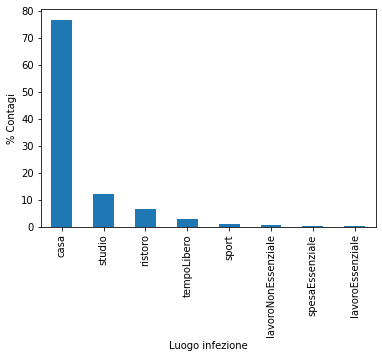

In [17]:
infectionType = infectionEvents.infectionType
infectionType = infectionType.str.split('_', expand=True)[0]

infectionType_vc = 100*infectionType.value_counts() / len(infectionType) #Percentuale
infectionType_vc.sort_index()
infectionType_vc.plot(kind='bar',xlabel="Luogo infezione",ylabel="% Contagi")

In [6]:
import networkx as nx
t=infectionEvents[['infector','infected']]
G = nx.Graph()
G = nx.from_pandas_edgelist(t, 'infector', 'infected')

nx.write_gexf(G,"Grafo.gexf")

In [7]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [8]:
df2

,connections
105,8
80,7
36,6
9,5
47,5
...,...
14,1
52,1
41,1
67,1
